# Model Selection

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from src.benchmark import Benchmark

from src.models.baseline import LogisticRegressor
from src.models.preprocessing import build_model

In [2]:
file_path = 'data/export.parquet'
df = pd.read_parquet(file_path)
X = df.drop(['Bag_Purchased', 'bag_base_price'], axis=1)
y = df['Bag_Purchased']

In [3]:
pl = build_model(imputer=True, engineered=True, interactions=True, dim_reduction="svd", scaler=True)
pl.set_params(svd__n_components=20)

Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=20))])

In [4]:
pl.fit(X, y)

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=20))])

In [5]:
svd = pl.named_steps.svd
columns = svd.feature_names_in_
index = svd.get_feature_names_out()

svd_df = pd.DataFrame(svd.components_, index=index, columns=columns)

us_movement_outside_us log_price      0.040577
passengers price_ratio                0.040605
bag_weight log_travel_time            0.040614
bag_weight passengers                 0.040702
children within_country               0.040721
                                        ...   
airlines_airline8                     0.063379
children is_intercontinental          0.066743
booking_window_group_21 - 60 days     0.066775
is_intercontinental log_passengers    0.069071
airlines_airline2                     0.070076
Length: 125, dtype: float64

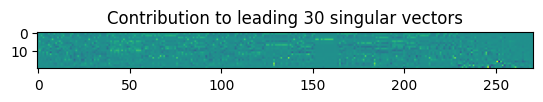

In [6]:
fig = plt.imshow(svd_df)
fig.axes.set_title("Contribution to leading 30 singular vectors")
features = svd_df.abs().mean().sort_values() 
features.tail(125)

Text(0.5, 1.0, 'Absolute feature contributions')

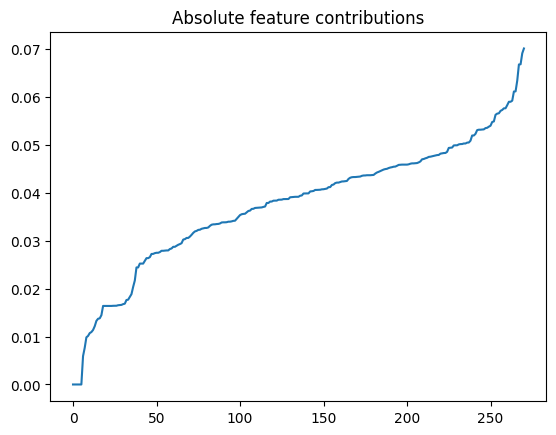

In [7]:
fig = plt.plot(features.values)
plt.title("Absolute feature contributions")

In [8]:
features[features > 0.02].index.values

array(['market_group_market5', 'market_group_market8',
       'src_dst_gdp log_price', 'log_grp_ratio log_price',
       'log_grp_ratio log_distance', 'src_dst_gdp log_distance',
       'travel_time log_price', 'booking_window_group_179 - 319 days',
       'src_dst_gdp', 'log_grp_ratio', 'price log_travel_time',
       'travel_time log_distance', 'travel_time',
       'booking_window_group_122 - 178 days',
       'log_grp_ratio log_travel_time', 'src_dst_gdp log_travel_time',
       'log_distance log_passengers', 'bag_weight log_grp_ratio',
       'src_dst_gdp bag_weight', 'log_travel_time^2',
       'price log_grp_ratio', 'src_dst_gdp price', 'distance',
       'log_price log_passengers', 'est_dst_temperature log_grp_ratio',
       'est_dst_temperature src_dst_gdp', 'distance log_price',
       'log_passengers', 'passengers log_distance',
       'market_group_market13', 'distance log_distance',
       'bag_total_price children', 'src_dst_gdp travel_time',
       'travel_time log_grp_r

In [9]:
# The is the structure of the preprocessing pipeline
model = build_model(imputer=True, engineered=True, interactions=True, dim_reduction="svd", scaler=True)

model

Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=30))])

In [20]:
# The simplest regression model 
#baseline = LogisticRegressor(max_iter=1000, penalty='l1', solver='liblinear')
baseline = build_model(model=LogisticRegression())

# LR with Linear Regression imputation for ticket price
LR_imputed = build_model(imputer=True, engineered=False, interactions=False, scaler=False, model=LogisticRegression())
LR_imputed.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with some feature engineering
LR_eng = build_model(imputer=False, engineered=True, interactions=False, model=LogisticRegression())
LR_eng.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with second order interactions among variables
LR_interactions = build_model(imputer=False, engineered=False, interactions=True, model=LogisticRegression())
LR_interactions.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with LR imputation, engineered features, second order interactions and feature selection by Latent Semantic Analysis (SVD)
LR_feature_select = build_model(imputer=True, engineered=True, interactions=True, features=features.index.values, model=LogisticRegression())
LR_feature_select.set_params(classifier__class_weight='balanced', classifier__solver='liblinear')

# LR with interactions and LSA
LR_svd = build_model(imputer=False, engineered=False, interactions=True, dim_reduction="svd", model=LogisticRegression())
LR_svd.set_params(classifier__class_weight='balanced')

# K-best feature selection using ANOVA
LR_kbest = build_model(imputer=False, engineered=False, interactions=True, dim_reduction='kbest', model=LogisticRegression())
LR_kbest.set_params(classifier__class_weight='balanced', classifier__solver='liblinear')

# Principal Component Analysis
LR_pca = build_model(imputer=False, engineered=False, interactions=True, dim_reduction='pca', model=LogisticRegression())
LR_pca.set_params(classifier__class_weight='balanced', classifier__penalty='l1', classifier__solver='liblinear')

GB_pca = build_model(imputer=False, engineered=False, interactions=True, dim_reduction='pca', model=GradientBoostingClassifier())
GB_pca_eng = build_model(imputer=False, engineered=True, interactions=True, dim_reduction='pca', model=GradientBoostingClassifier())


models={
    'baseline': baseline,
    'LR_imputed': LR_imputed,
    'LR_eng': LR_eng,
    'LR_interactions': LR_interactions,
    #'LR_regularized': LR_regularized,
    'LR_feature_select': LR_feature_select,
    'LR_kbest': LR_kbest,
    #'LR_svd': LR_svd,
    #'LR_pca': LR_pca,
    #'GB_pca': GB_pca,
    #'GB_pca_eng': GB_pca_eng,
    
    # 'LR': build_model(imputer=True, engineered=False, interactions=True, dim_reduction="svd", scaler=True, model=LogisticRegression()),
    #'LR2': build_model(imputer=True, engineered=False, interactions=True, features=features[features > 0.02].index.values, model=LogisticRegression()),
    # GradientBoosting(name='gradBoost'),
    # SupportVectorMachine(name='SVM', kernel='rbf')
    # NaiveBayes(name='GaussianNB')
}

In [21]:
benchmark = Benchmark(models=models)
scores = benchmark.evaluate()
scores

  0%|          | 0/6 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 93 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-pac

,ROC-AUC Score
LR_eng,0.774889
LR_interactions,0.774356
LR_imputed,0.766021
LR_kbest,0.744490
baseline,0.742510
LR_feature_select,0.735929


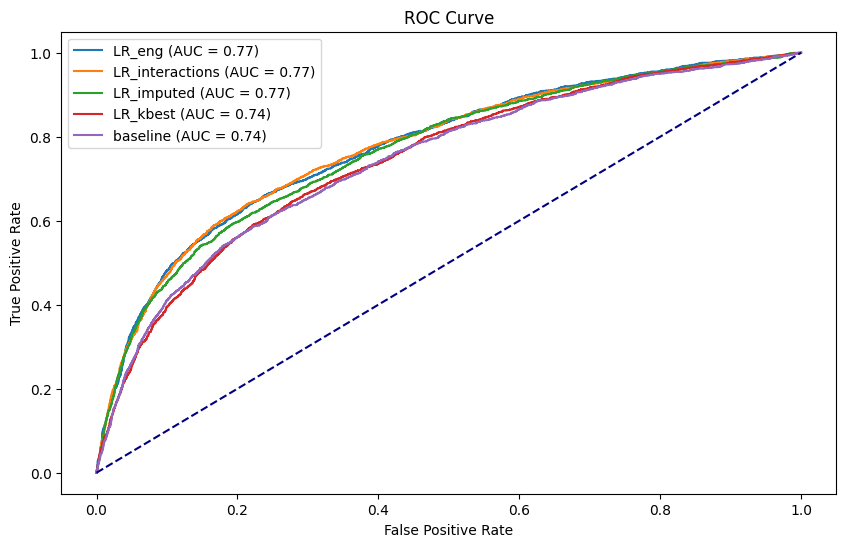

In [23]:
benchmark.roc_auc_plot(models=scores.head(5).index)

It seems that feature engineering, interactions, linear regression imputation and ANOVA f-test for dimensionality are the best choices

In [24]:
models['LR_best'] = build_model(imputer=True, engineered=True, interactions=True, dim_reduction='kbest', model=LogisticRegression())
models['LR_best'].set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

benchmark = Benchmark(models=models)
benchmark.evaluate()

  0%|          | 0/7 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 93 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-pac

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [127 154 156 162 163 176 192] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [127 154 162 163 176 192] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/en

,ROC-AUC Score
LR_eng,0.775063
LR_interactions,0.774337
LR_imputed,0.766034
LR_best,0.749496
LR_kbest,0.744490
baseline,0.742510
LR_feature_select,0.735929


Not really better. Let's try with sample balancing

In [39]:
models = {
    'LR_eng': LR_eng,
    'baseline': baseline,
    'LR_eng_balanced': build_model(imputer=True, engineered=True, interactions=False, model=LogisticRegression())
}
models['LR_eng_balanced'].set_params(
    classifier__max_iter=1000, 
    classifier__penalty='l1', 
    classifier__solver='liblinear', 
    classifier__class_weight='balanced'
)

bm = Benchmark(models=models)
bm.evaluate()

  0%|          | 0/3 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

,ROC-AUC Score
LR_eng,0.775052
LR_eng_balanced,0.771450
baseline,0.742510


Slightly better. Let's try now with different regression techniques

In [49]:
models['GB'] = build_model(imputer=False, engineered=True, interactions=False, model=GradientBoostingClassifier())
models['GB_interactions'] = build_model(imputer=False, engineered=True, interactions=True, model=GradientBoostingClassifier())
models['SVM'] = build_model(imputer=False, engineered=True, interactions=False, model=SVC(probability=True))
models['NB'] = build_model(imputer=False, engineered=True, interactions=False, model=GaussianNB())

In [50]:
bm = Benchmark(models=models)
bm.evaluate()

  0%|          | 0/7 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

,ROC-AUC Score
GB,0.782338
GB_interactions,0.782165
LR_eng,0.775105
LR_eng_balanced,0.771446
baseline,0.742510
NB,0.734470
SVM,0.567409


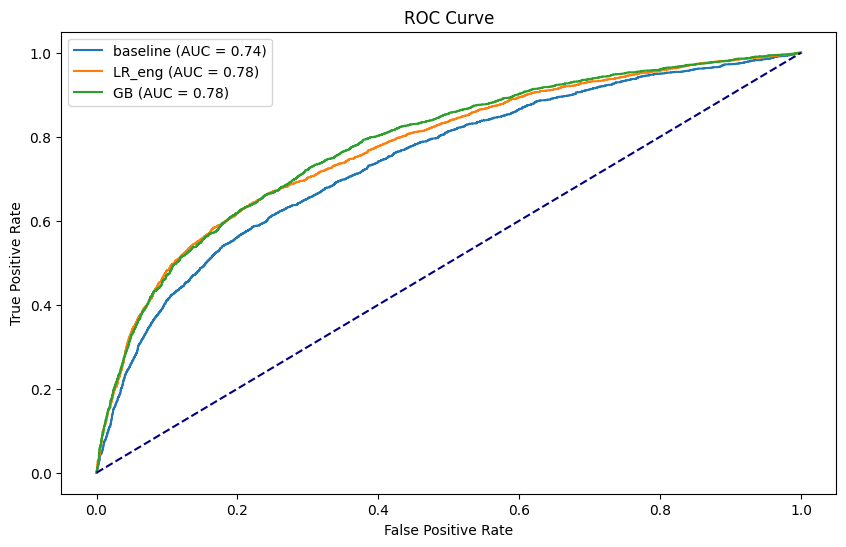

In [48]:
bm.roc_auc_plot(models=['baseline', 'LR_eng', 'GB'])

**The best model is Gradient Boosting with engineered features**